In [1]:
#coding=utf-8

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.DataFrame({"x": range(11)[1:], "y": [4.5, 4.75, 4.91, 5.34, 5.8, 7.05, 7.9
                                              , 8.23, 8.7, 9]})
data

,x,y
0,1,4.50
1,2,4.75
2,3,4.91
3,4,5.34
4,5,5.80
5,6,7.05
6,7,7.90
7,8,8.23
8,9,8.70
9,10,9.00


In [4]:
#given data frame and x0, calculate the cost and labels
def cost(df, x0):
    df_sub1 = df[df.x <= x0]
    df_sub2 = df[df.x > x0]
    cost_sub1 = 0
    cost_sub2 = 0
    for i in df_sub1.y:
        cost_sub1 += (i - df_sub1.y.mean()) ** 2
    for i in df_sub2.y:
        cost_sub2 += (i - df_sub2.y.mean()) ** 2
    return [x0, cost_sub1 + cost_sub2, df_sub1.y.mean(), df_sub2.y.mean()]

In [5]:
#given data frame, calculate x0 and cost and labels
def cut(data):
    for n, i in enumerate(data.x):
        if n == 0:
            [x0, cost_min, y1, y2] = cost(data, i)
        elif n > 0:
            if cost(data, i)[1] < cost_min:
                [x0, cost_min, y1, y2] = cost(data, i)
    return [x0, cost_min, y1, y2]

In [6]:
#given x, predict its value based on the model built
def predict(x, data, cuts_x):
    for n, i in enumerate(cuts_x):
        if n < len(cuts_x) - 1:
            if x > i and x <= cuts_x[n + 1]:
                data_sub = data[(data.x > i) & (data.x <= cuts_x[n + 1])]
                return data_sub.y.mean()
            elif x <= i:
                data_sub = data[data.x <= i]
                return data_sub.y.mean()
        elif n == len(cuts_x) - 1:
            if x > i:
                data_sub = data[data.x > i]
                return data_sub.y.mean()

In [11]:
#main flow
critia = 2 #the maximum limit for cost
cost_alpha = cost(data, data.x.max)
cost_belta = cost_alpha
cuts = []
cuts_x = []
data_subs = [data]
while cost_belta >= 1:
    cuts.append([])
    cost_belta = 0
    data_subs_new = []
    for n, i in enumerate(data_subs):
        cuts[-1].append(cut(i))
        cost_belta += cut(i)[1]
        cuts_x.append(cut(i)[0])
        data_subs_new.append(i[i.x <= cut(i)[0]])
        data_subs_new.append(i[i.x > cut(i)[0]])
    data_subs = data_subs_new
cuts_x = list(set(cuts_x))
print 'Total cost: ', cost_belta
print '\n'
print 'cuts information: '
print '[cut_x, subset_cost, subset1_y_average, subset2_y_average]'
for c in cuts:
    print c
print '\n'
print 'divide points: '
print cuts_x

Total cost:  0.853716666667


cuts information: 
[cut_x, subset_cost, subset1_y_average, subset2_y_average]
[[5, 3.358719999999999, 5.0600000000000005, 8.1759999999999984]]
[[3, 0.19120000000000004, 4.7199999999999998, 5.5700000000000003], [7, 0.66251666666666664, 7.4749999999999996, 8.6433333333333326]]


divide points: 
[3, 5, 7]


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


blue: Train
red: Fit


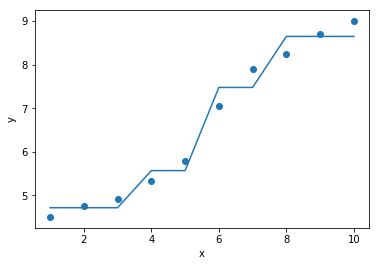

In [13]:
prediction = pd.DataFrame({"x": range(11)[1:], "y": [None] * 10})
for n, i in enumerate(prediction.x):
    prediction.y[n] = predict(i, data, cuts_x)
prediction
plt.scatter(data.x, data.y, label = 'train')
plt.plot(prediction.x, prediction.y, label = 'fit')
plt.xlabel("x")
plt.ylabel("y")
print 'blue: Train'
print 'red: Fit'
plt.show()